In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("D:\Capstone\Databases\ML CSV\VFDB\TCSC_MAV_STE_MEA_shannon_sample_git_power_energy_git_skew_kur_std\TCSC_MAV_STE_MEA_shannon_sample_git_power_energy_git_skew_kur_std_vf18-vf39.csv")

In [ ]:
df.shape

(9240, 12)

In [ ]:
# Separate the data into two classes
class_0 = df[df["rhythm"] == 0]
class_1 = df[df["rhythm"] == 1]

# Undersample class 0 to match the number of samples in class 1
class_0_undersampled = class_0.sample(n=len(class_1), random_state=42)

# Concatenate the undersampled class 0 with class 1
balanced_df = pd.concat([class_0_undersampled, class_1])

# Shuffle the concatenated DataFrame to mix the rows
balanced_df = balanced_df.sample(frac=1, random_state=100)

In [ ]:
print(balanced_df['rhythm'].value_counts())

rhythm
0    1650
1    1650
Name: count, dtype: int64


In [ ]:
X = balanced_df.iloc[:, :-1]
y = balanced_df.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 100)

In [ ]:
X_test.shape, X_train.shape, y_test.shape , y_train.shape

((660, 11), (2640, 11), (660,), (2640,))

In [ ]:
X.columns

Index(['TCSC', 'MAV', 'STE', 'MEA', 'shannon_git', 'sample_git', 'power_git',
       'energy_git', 'skewness', 'kurtosis', 'std_dev'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
clf.feature_importances_

array([0.1424792 , 0.03810473, 0.16393226, 0.14216616, 0.03323579,
       0.04874925, 0.04151628, 0.03261685, 0.09699698, 0.22745843,
       0.03274405])

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[305,  16],
       [ 20, 319]], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9454545454545454

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       325
           1       0.94      0.95      0.95       335

    accuracy                           0.95       660
   macro avg       0.95      0.95      0.95       660
weighted avg       0.95      0.95      0.95       660



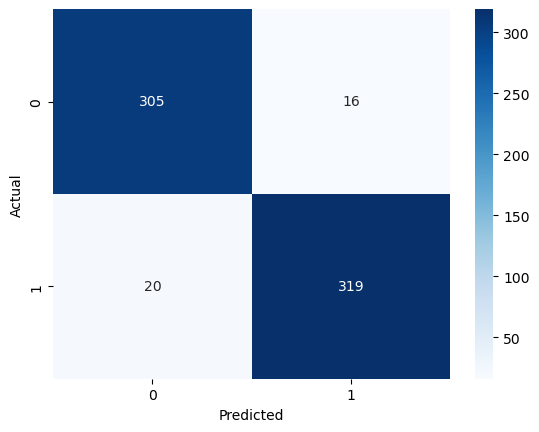

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
con_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(con_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


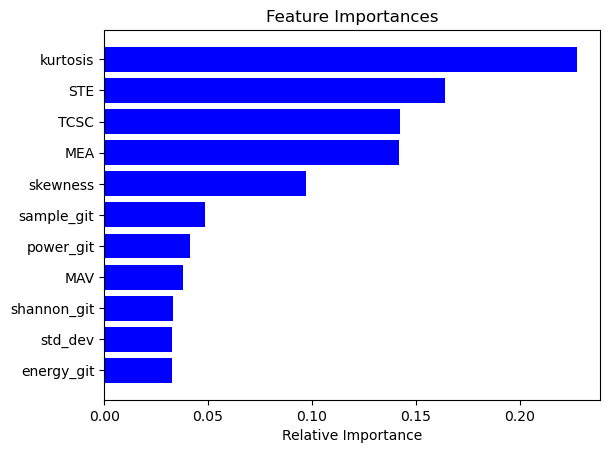

In [ ]:
features = df.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()